## MOEA/D


This algorithm is implemented based on <cite data-cite="moead"></cite>. 

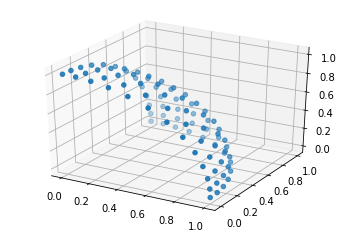

In [1]:
from pymoo.algorithms.moead import moead
from pymoo.optimize import minimize
from pymoo.util import plotting
from pymop.factory import get_problem, UniformReferenceDirectionFactory

# create the optimization problem
ref_dirs = UniformReferenceDirectionFactory(3, n_points=100).do()

method = moead(
    ref_dirs=ref_dirs,
    n_neighbors=15,
    decomposition="pbi",
    prob_neighbor_mating=0.7
)

res = minimize(get_problem("dtlz2"),
               method,
               termination=('n_gen', 200)
               )

plotting.plot(res.F)


### API